In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os, argparse, math, random
from datetime import datetime
import errno

start_time = datetime.now()

outputPath = "../dataset/prep/2b/pca/"

if not os.path.exists(os.path.dirname(outputPath)):
    try:
        os.makedirs(os.path.dirname(outputPath))
    except OSError as exc:  # Guard against race condition
        if exc.errno != errno.EEXIST:
            raise

inputPath = "../dataset/prep/2b/bovw/"

classNames = ["bayou", "chalet", "creek"]
dataTypes = ["test", "train"]

In [2]:
wholeData = []

def fileHandle(fileName):
#     wholeData = []
    file = open(fileName)
    for line in file:
        teLine = line.rstrip('\n ').split(' ')
        nLine = [float(i) for i in teLine]
        nLine = np.array(nLine)
        wholeData.append(nLine)
    file.close()
    return 

def fileHandle2(fileName):
    wholeData = []
    file = open(fileName)
    for line in file:
        teLine = line.rstrip('\n ').split(' ')
        nLine = [float(i) for i in teLine]
        nLine = np.array(nLine)
        wholeData.append(nLine)
    file.close()
    return wholeData

count = 0
for root, dirs, files in os.walk(inputPath):
    for f in files:
        count += 1
        path = os.path.relpath(os.path.join(root, f), ".")
        print(count,":: read: ",path)
        fileHandle(path)

wholeData = np.array(wholeData)
dataMean = np.mean(wholeData, axis=0)
print(np.shape(wholeData))
print("Mean: ",len(dataMean))

yn = wholeData - dataMean

# covMat = np.cov(wholeData.T)
# covMat = np.cov(yn)
covMat = np.matmul(yn.T, yn)

print(np.shape(covMat))

# print(covMat)
# for i in covMat:
#     for j in i:
#         print(j,end=' ')
#     print(end='\n')

1 :: read:  ..\dataset\prep\2b\bovw\test_bayou.bovw
2 :: read:  ..\dataset\prep\2b\bovw\test_chalet.bovw
3 :: read:  ..\dataset\prep\2b\bovw\test_creek.bovw
4 :: read:  ..\dataset\prep\2b\bovw\train_bayou.bovw
5 :: read:  ..\dataset\prep\2b\bovw\train_chalet.bovw
6 :: read:  ..\dataset\prep\2b\bovw\train_creek.bovw
(300, 32)
Mean:  32
(32, 32)


(32, 32)
[  224320.42475972   274469.85948665   358649.28105397   434414.85065489
   481626.05384117   516263.0984255    655539.70386741   671148.83413829
   810830.63085092   879798.80776685   960084.32277545  1239283.71384638
  1263047.12970348  1480687.81632925  1600954.45289593  1859780.39805428
  2273831.17564344  2303775.66010176  2765249.04397803  3223402.10850076
  3784990.43114178  4433639.974838    5122734.37350192  6690322.75123115
  8373954.44138732  9695706.04601122 11172147.87579106 14230119.10216012
 15617971.35714115 19071237.69591287 32602656.85697561 76568801.22390023]
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32]


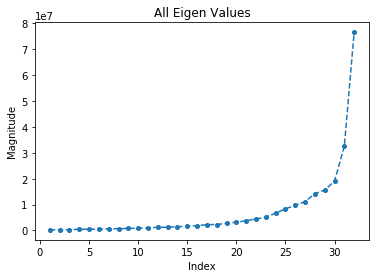

In [34]:
eigenValues, eigenVectors = np.linalg.eigh(covMat)
# allDirs = eigenVectors[np.argsort(eigenValues)]

sortedDirs = eigenVectors[np.argsort(-eigenValues)]
# print(eigenValues[np.argsort(-eigenValues)])
print(np.shape(eigenVectors))

print(eigenValues)

# print(wholeData[0].T.dot(eigenVectors[0]))
# print(eigenVectors[-1])

def plot():
    xVal = np.arange(1,len(eigenValues)+1,1)
    print(xVal)
#     xVal.append(32)
#     print(xVal)
    plt.plot(xVal, eigenValues, marker='o',markersize='4', linestyle='--')
    plt.ylabel("Magnitude")
    plt.xlabel("Index")
    plt.title("All Eigen Values")
#     plt.show()
    plt.savefig("eigenVal.jpg")
plot()

In [4]:
allData = []   
    
for dataType in dataTypes:
    for className in classNames:
        fileName = inputPath+dataType+"_"+className+".bovw"
        print(fileName)
        allData.append(fileHandle2(fileName))
allData = np.array(allData)

# print(allData)
        
def writePCA(l, dataType, className, values):
#     print(values)
    path = outputPath + dataType + "_" + className + "_" + str(l) + ".pca"
    if not os.path.exists(os.path.dirname(path)):
        try:
            os.makedirs(os.path.dirname(path))
        except OSError as exc:  # Guard against race condition
            if exc.errno != errno.EEXIST:
                raise
    try:
        print("target File: ", path)
        outfile = open(path, "w")
    except IOError:
        print("File not created !!!!!!!!!!!!!!!!!!!!!!!!!")
        
    for line in values:
#         print(line)
        for feature in line:
            outfile.write(str(feature)+" ")
#             print(str(feature)+" ")
        outfile.write("\n")
        
    outfile.close()

../dataset/prep/2b/bovw/test_bayou.bovw
../dataset/prep/2b/bovw/test_chalet.bovw
../dataset/prep/2b/bovw/test_creek.bovw
../dataset/prep/2b/bovw/train_bayou.bovw
../dataset/prep/2b/bovw/train_chalet.bovw
../dataset/prep/2b/bovw/train_creek.bovw


In [5]:
count = 0
# print(allData)

for i in range(1,33,1):
    count = 0
    for dataType in dataTypes:
        print(dataType)
        for className in classNames:
            print(className)
            values = []
            for line in allData[count]:
                lineval = []
                for j in range(i):
                    val = eigenVectors[j].T.dot(line)
                    lineval.append(val)
                values.append(lineval)
                
#             print(lineval)
#             print(i, " : ", len(values), " : ", len(values[0]))
#             print(values)
            writePCA(i, dataType, className, values)
            count += 1

test
bayou
target File:  ../dataset/prep/2b/pca/test_bayou_1.pca
chalet
target File:  ../dataset/prep/2b/pca/test_chalet_1.pca
creek
target File:  ../dataset/prep/2b/pca/test_creek_1.pca
train
bayou
target File:  ../dataset/prep/2b/pca/train_bayou_1.pca
chalet
target File:  ../dataset/prep/2b/pca/train_chalet_1.pca
creek
target File:  ../dataset/prep/2b/pca/train_creek_1.pca
test
bayou
target File:  ../dataset/prep/2b/pca/test_bayou_2.pca
chalet
target File:  ../dataset/prep/2b/pca/test_chalet_2.pca
creek
target File:  ../dataset/prep/2b/pca/test_creek_2.pca
train
bayou
target File:  ../dataset/prep/2b/pca/train_bayou_2.pca
chalet
target File:  ../dataset/prep/2b/pca/train_chalet_2.pca
creek
target File:  ../dataset/prep/2b/pca/train_creek_2.pca
test
bayou
target File:  ../dataset/prep/2b/pca/test_bayou_3.pca
chalet
target File:  ../dataset/prep/2b/pca/test_chalet_3.pca
creek
target File:  ../dataset/prep/2b/pca/test_creek_3.pca
train
bayou
target File:  ../dataset/prep/2b/pca/train_ba

target File:  ../dataset/prep/2b/pca/train_chalet_23.pca
creek
target File:  ../dataset/prep/2b/pca/train_creek_23.pca
test
bayou
target File:  ../dataset/prep/2b/pca/test_bayou_24.pca
chalet
target File:  ../dataset/prep/2b/pca/test_chalet_24.pca
creek
target File:  ../dataset/prep/2b/pca/test_creek_24.pca
train
bayou
target File:  ../dataset/prep/2b/pca/train_bayou_24.pca
chalet
target File:  ../dataset/prep/2b/pca/train_chalet_24.pca
creek
target File:  ../dataset/prep/2b/pca/train_creek_24.pca
test
bayou
target File:  ../dataset/prep/2b/pca/test_bayou_25.pca
chalet
target File:  ../dataset/prep/2b/pca/test_chalet_25.pca
creek
target File:  ../dataset/prep/2b/pca/test_creek_25.pca
train
bayou
target File:  ../dataset/prep/2b/pca/train_bayou_25.pca
chalet
target File:  ../dataset/prep/2b/pca/train_chalet_25.pca
creek
target File:  ../dataset/prep/2b/pca/train_creek_25.pca
test
bayou
target File:  ../dataset/prep/2b/pca/test_bayou_26.pca
chalet
target File:  ../dataset/prep/2b/pca/tes

In [22]:
a = np.array([[1,2,3,4,5],[6,7,8,9,10]])
m = np.mean(a,axis=0)
print(m)
b = a-m
print(b)
print(a*b)

[3.5 4.5 5.5 6.5 7.5]
[[-2.5 -2.5 -2.5 -2.5 -2.5]
 [ 2.5  2.5  2.5  2.5  2.5]]
[[ -2.5  -5.   -7.5 -10.  -12.5]
 [ 15.   17.5  20.   22.5  25. ]]


In [ ]:
a = np.array([1,2,3])